In [43]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image
from plottable.plots import image
import sys
import os

# Adjust the path to include the FPL directory
fpl_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'FPL'))
sys.path.append(fpl_path)
# Now you can import your modules
from fpl_api_collection import (
    get_league_table, get_current_gw, get_fixt_dfs, get_bootstrap_data
)
from fpl_utils import (
    define_sidebar
)

In [44]:
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        image = Image.open(response).convert("RGBA")
    return image 

In [45]:
league_df = get_league_table()
team_fdr_df, team_fixt_df, team_ga_df, team_gf_df = get_fixt_dfs()
ct_gw = get_current_gw()
new_fixt_df = team_fixt_df.loc[:, ct_gw:(ct_gw+2)]
new_fixt_cols = ['GW' + str(col) for col in new_fixt_df.columns.tolist()]
new_fixt_df.columns = new_fixt_cols
new_fdr_df = team_fdr_df.loc[:, ct_gw:(ct_gw+2)]
league_df = league_df.join(new_fixt_df)
float_cols = league_df.select_dtypes(include='float64').columns.values
league_df = league_df.reset_index()
league_df.rename(columns={'team': 'Team'}, inplace=True)
league_df.index += 1
league_df['GD'] = league_df['GD'].map('{:+}'.format)
teams_df = pd.DataFrame(get_bootstrap_data()['teams'])
teams_df['logo_url'] = "https://resources.premierleague.com/premierleague/badges/70/t" + teams_df['code'].astype(str) + "@x2.png"
teams_df['logo_image'] = teams_df['logo_url'].apply(load_image_from_url)
team_logo_mapping = pd.Series(teams_df['logo_image'].values, index=teams_df['short_name']).to_dict()
# Map each team's logo image to the league DataFrame
league_df['logo_team'] = league_df['Team'].map(team_logo_mapping)
# Calculate and assign rankings in the league DataFramae
league_df['Rank'] = league_df['Pts'].rank(ascending=False, method='min').astype(int)


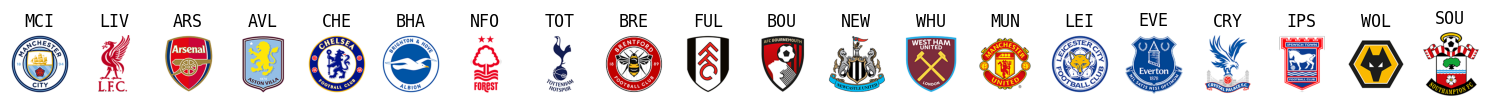

In [46]:
fig, axes = plt.subplots(1, len(league_df), figsize=(15, 3))
for ax, (index, row) in zip(axes, league_df.iterrows()):
    ax.imshow(row['logo_team'])
    ax.axis('off')
    ax.set_title(row['Team'])
plt.tight_layout()
plt.show()

In [47]:
league_df.columns

Index(['Team', 'GP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'CS', 'Pts', 'Form',
       'Pts/Game', 'GF/Game', 'GA/Game', 'CS/Game', 'GW10', 'GW11', 'GW12',
       'logo_team', 'Rank'],
      dtype='object')

In [48]:
bg_color="#FFFFFF"
text_color="#000000"

row_colors = {
    "top4":"#E1FABC",
    "top6":"#FFFC97",
    "relegation":"#E79A9A",
    "even":"#E2E2E1",
    "odd":"#B3B0B0"
}

plt.rcParams["text.color"]=text_color
plt.rcParams["font.family"]="monospace"

In [49]:
col_defs = [
    ColumnDefinition(
        name="Rank",
        textprops={'ha': "center"},
        width=0.5
    ),
    ColumnDefinition(
        name="logo_team",
        textprops={'ha': "center", 'va': "center", 'color': "white"},
        plot_fn=image,
        width=0.5,
    ),
    ColumnDefinition(
        name="Team",
        textprops={'ha': "left", 'weight': "bold"},
        width=1.75
    ),
    ColumnDefinition(
        name="GP",
        group="Matches Played",
        textprops={'ha': "center"},
        width=0.5
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={'ha': "center"},
        width=0.5
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={'ha': "center"},
        width=0.5
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={'ha': "center"},
        width=0.5
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={'ha': "left", 'weight': "bold"},
        width=0.5
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={'ha': "left", 'weight': "bold"},
        width=0.5
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={'ha': "left", 'weight': "bold"},
        width=0.5
    ),
    ColumnDefinition(
        name="CS",
        group="Goals",
        textprops={'ha': "left", 'weight': "bold"},
        width=0.5
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    ),
    ColumnDefinition(
        name="Pts/Game",
        group="Points",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    ),
    ColumnDefinition(
        name="Form",
        group="Points",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    ),
    ColumnDefinition(
        name="GF/Game",
        group="ByGame",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    ),
    ColumnDefinition(
        name="GA/Game",
        group="ByGame",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    ),
    ColumnDefinition(
        name="CS/Game",
        group="ByGame",
        textprops={'ha': "left", 'weight': "bold"},
        width=1
    )
]

AttributeError: 'Image' object has no attribute 'read'

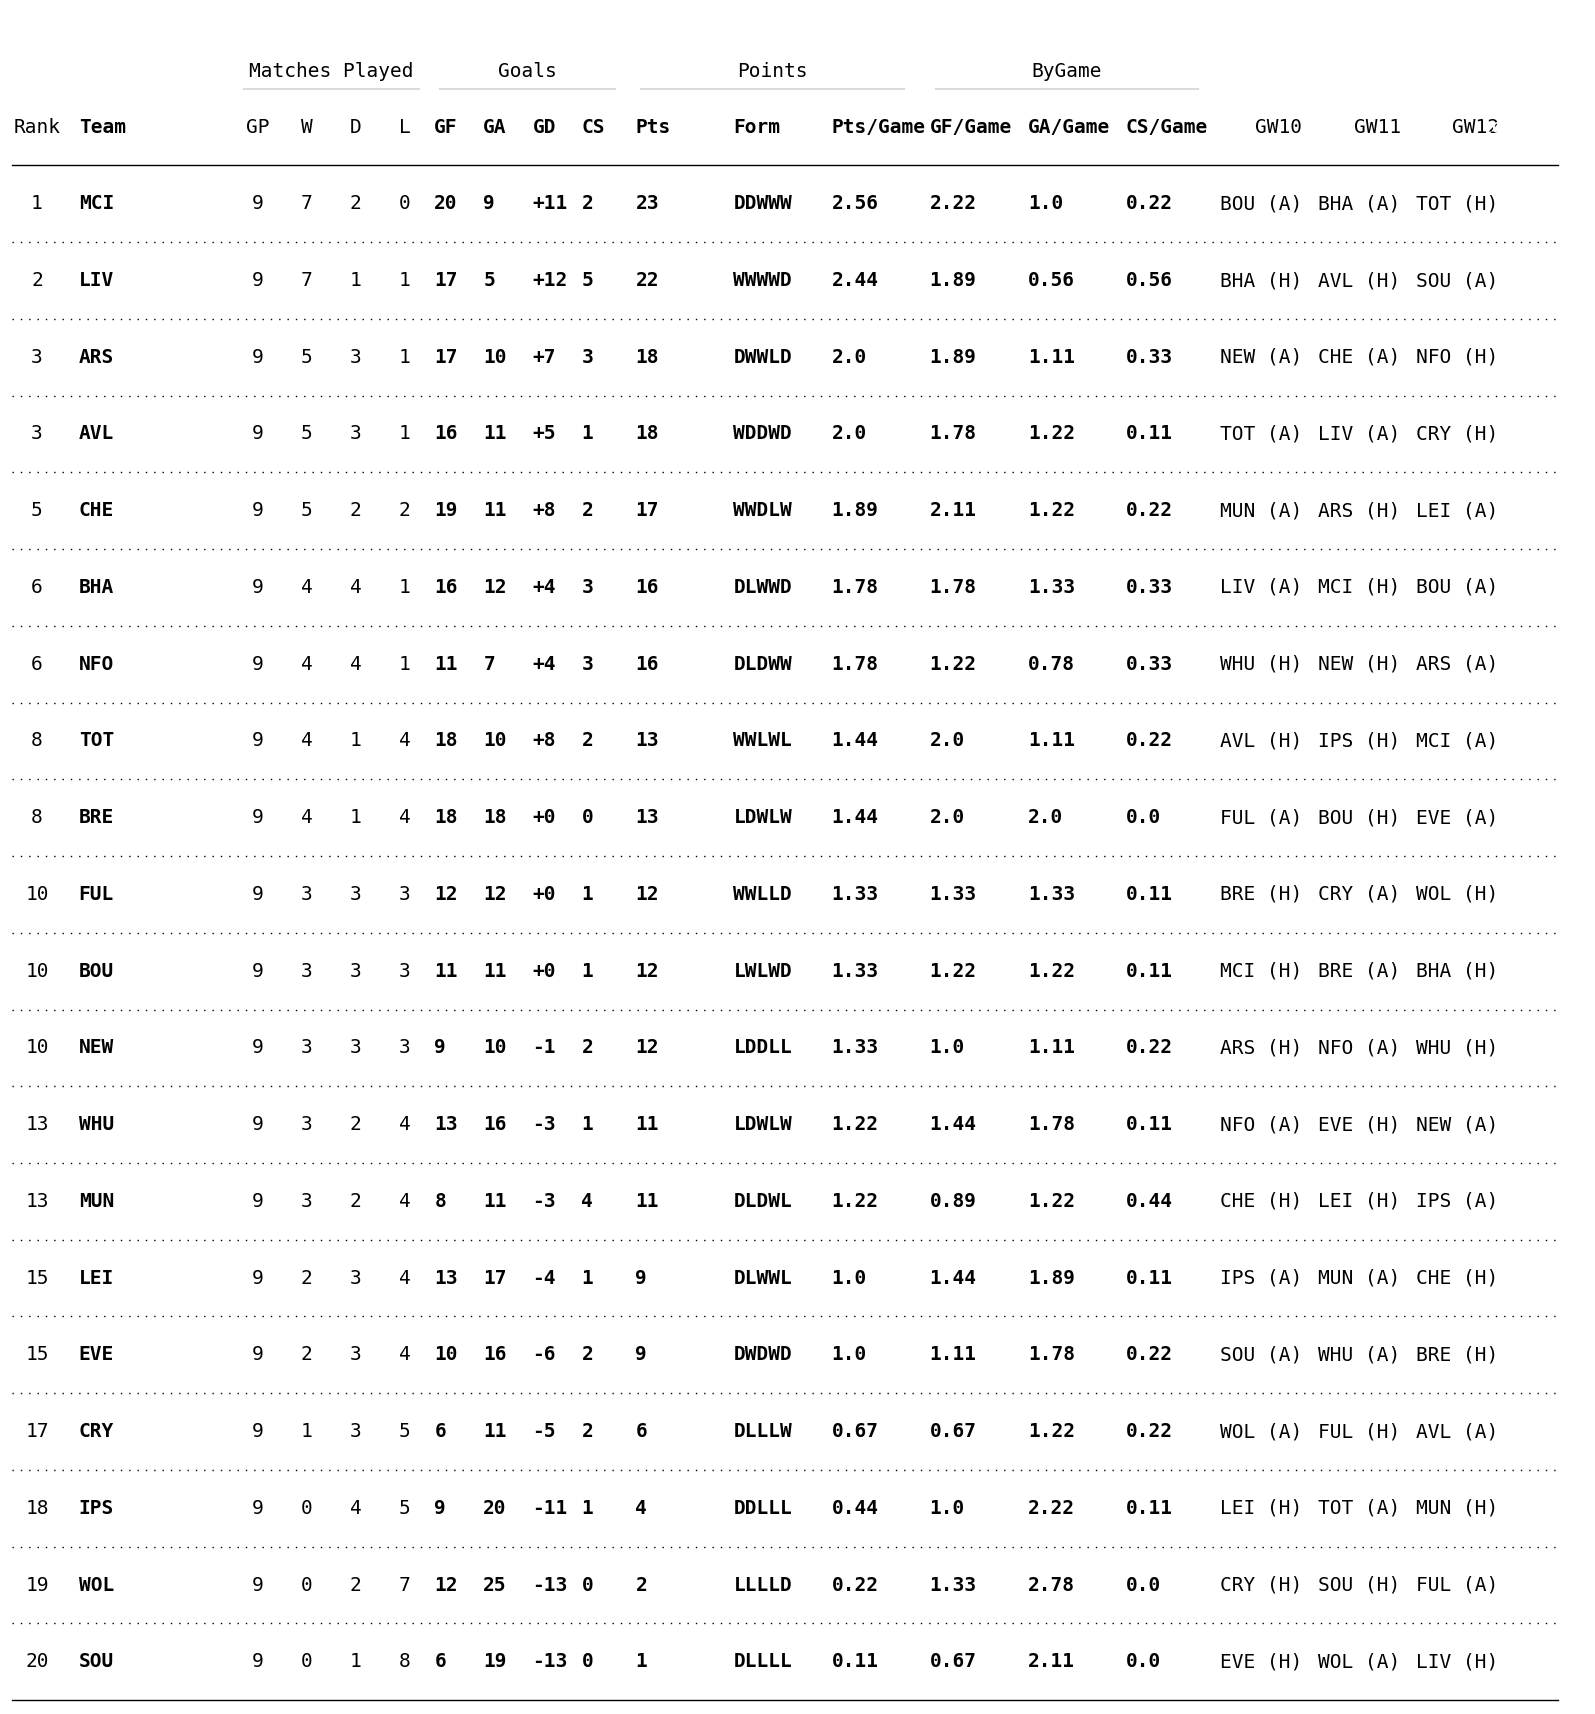

In [50]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

table = Table(
    league_df,
    column_definitions=col_defs,
    index_col="Rank",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax
)